# **Springboard Decision Tree Specialty Coffee Case Study - Tier 3**




# The Scenario

Imagine you've just finished the Springboard Data Science Career Track course, and have been hired by a rising popular specialty coffee company - <b>RR Diner Coffee</b> - as a data scientist. Congratulations!

<b>Products and Stores:</b>

RR Diner Coffee sells two types of thing:

1. Specialty coffee beans, in bulk (by the kilogram only)
2. Coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

  RR Diner Coffee has three stores, two in Europe and one in the USA. The flagship store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges.

<b>Data Science Initiative:</b>

You've been taken on at RR Diner Coffee because the company are turning towards using data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with.

<b>Coffee Sourcing and Distribution:</b>

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin.

<b>Decision Regarding Hidden Farm Coffee:</b>

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the <b>Hidden Farm</b>) in rural China: there are rumors their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling Hidden Farm coffee could save the RR Diner Coffee business.

<b>Task Assigned:</b>

Your first job, then, is to build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.

<b>Customer Survey Data:</b>

To this end, you and your team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':

* Age
* Gender
* Salary
* Whether they have bought at least one RR Diner Coffee product online
* Their distance from the flagship store in the USA (standardized to a number between 0 and 11)
* How much they spent on RR Diner Coffee products on the week of the survey
* How much they spent on RR Diner Coffee products in the month preceding the survey
* The number of RR Diner coffee bean shipments each customer has ordered over the preceding year.

  You also asked each customer participating in the survey whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question.

<b>Decision Threshold:</b>

You sit back and think: if more than $70\%$ of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal, and the Hidden Farm coffee will remain in legends only. There's some doubt in your mind about whether $70\%$ is a reasonable threshold, but it'll do for the moment.

<b>Problem Solving Approach:</b>

To solve the problem, then, you will build a decision tree to implement a classification solution.

> <b>NOTE:</b> As ever, this notebook is **tiered**, meaning you can elect that tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest. This is ***tier 3***, so it will be challenging.
    

---

# 0. Overview

This notebook uses decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA, could predict whether customers would purchase the Hidden Farm coffee if a deal with its farmers were struck.

---

# 1. Packages

In [50]:
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
from tabulate import tabulate
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree, metrics, ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [51]:
# Set the desired number of decimal places (e.g., 2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Functions

### <code><b>build_fit_predict()</b></code>

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html"><code><b>sklearn.tree.DecisionTreeClassifier</b></code></a>

* <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html"><code><b>sklearn.ensemble.RandomForestClassifier</b></code></a>

In [53]:
def build_fit_predict(
      train_features
    , train_target
    , test_features
    , method       = None
    , criterion    = None
    , max_depth    = None
    , random_state = None
):
    """
    Train a Decision Tree or Random Forest Classifier and evaluate it.

    Parameters:
        train_features (DataFrame): The training data features.
        train_target (Series): The target labels for the training data.
        test_features (DataFrame): The test data features for evaluation.
        method (string): sklearn method for building the classifier, "decision_tree" or "random_forest".
        criterion (str or None, optional): Splitting criterion, "gini" or "entropy" (default: "gini").
        max_depth (int or None, optional): Maximum depth of the decision tree (None means unlimited depth).
        random_state (int or None, optional): Seed for random number generation (for reproducibility).

    Returns:
        DecisionTreeClassifier or RandomForestClassifier: The trained Classifier.
        Series: Predicted labels for the test data.

    This function trains a Decision Tree or Random Forest Classifier using the provided training data
    (train_features and train_target), evaluates it on the test data (test_features),
    and returns both the trained classifier and the predicted labels for the test data.

    Example:
    >>> from sklearn.metrics import accuracy_score
    >>> X_train, y_train, X_test, y_test = load_data()
    >>> trained_classifier, predictions = train_decision_tree_classifier(X_train, y_train, X_test, criterion="entropy", max_depth=5)
    >>> accuracy = accuracy_score(y_test, predictions)
    >>> print(f"Accuracy: {accuracy:.2f}")

    Note:
    - If 'random_state' is provided, it ensures reproducibility of results.
    - You can use 'trained_classifier' to make predictions on new data.
    """
    # -------------------------------------------------------------------------
    #                                BUILD
    # -------------------------------------------------------------------------
    if method == "decision_tree":
      # Create a Decision Tree Classifier with the specified parameters
      clf = tree.DecisionTreeClassifier(
            criterion    = criterion
          , max_depth    = max_depth
          , random_state = random_state
      )

    elif method == "random_forest":
      # Create a Random Forest Classifier with the specified parameters
      clf = ensemble.RandomForestClassifier(
            criterion    = criterion
          , max_depth    = max_depth
          , random_state = random_state
    )
    # -------------------------------------------------------------------------
    #                                FIT
    # -------------------------------------------------------------------------
    # Train the classifier on the training data
    clf.fit(
          train_features
        , train_target
    )
    # -------------------------------------------------------------------------
    #                              PREDICT
    # -------------------------------------------------------------------------
    # Make predictions on the test data
    predictions = clf.predict(
        test_features
    )

    return clf, pd.Series(predictions)

## <code><b>evaluate_metrics()</b></code>

In [54]:
def evaluate_metrics(
      y_test
    , y_pred
    , classes = ["Yes", "No"]
):

  # accuracy
  accuracy = metrics.accuracy_score(
        y_test
      , y_pred
  )

  # balanced_accuracy
  balanced_accuracy = metrics.balanced_accuracy_score(
        y_test
      , y_pred
  )

  # precision_yes
  precision_yes = metrics.precision_score(
        y_test
      , y_pred
      , pos_label=classes[0]
  )

  # precision_no
  precision_no = metrics.precision_score(
        y_test
      , y_pred
      , pos_label=classes[1]
  )

  # recall_yes
  recall_yes = metrics.recall_score(
        y_test
      , y_pred
      , pos_label=classes[0]
  )

  # recall_no
  recall_no = metrics.recall_score(
        y_test
      , y_pred
      , pos_label=classes[1]
  )

  # table of metrics
  table = [
        ["Metric", "Score"]
      , ["accuracy", accuracy]
      , ["balanced_accuracy", balanced_accuracy]
      , ["precision ('Yes')", precision_yes]
      , ["precision ('No')", precision_no]
      , ["recall ('Yes')", recall_yes]
      , ["recall ('No')", recall_no]
  ]

  return print(tabulate(table, headers="firstrow"))

## <code><b>visualize_tree()</b></code>

In [55]:
def visualize_tree(
      model_name
    , feature_names
    , class_names   = ["NO", "YES"]
    , graph_rankdir = "LR"
    , graph_dpi     = 200
    , graph_size    = "4, 4"

):

  dot_data = StringIO()

  # We can do so with export_graphviz
  tree.export_graphviz(
        model_name
      , out_file           = dot_data
      , filled             = True
      , rounded            = True
      , special_characters = True
      , feature_names      = feature_names
      , class_names        = class_names
  )

  # Alternatively for class_names use entr_model.classes_
  graph = pydotplus.graph_from_dot_data(
      dot_data.getvalue()
  )

  # Set DPI and size parameters
  graph.set_rankdir(graph_rankdir) #default: TB
  graph.set_dpi(graph_dpi)
  graph.set_size(f'{graph_size}')

  # Generate the PNG image with the specified DPI and size
  png_image = graph.create_png()

  return Image(png_image)

# 3. EDA

In [56]:
# Read in the data to a variable called coffeeData
coffeeData = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/data/RRDinerCoffeeData.csv"
)

As we've seen, exploration entails doing things like checking out the **initial appearance** of the data with head(), the **dimensions** of our data with .shape, the **data types** of the variables with .info(), the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**.

How much of this can you do yourself by this point in the course? Have a real go.

In [57]:
# Call head() on your data
coffeeData.head()

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.00,0,1.00
1,24,Male,0,44,164,74035,0.52,0,NaN
2,24,Male,0,39,119,30563,0.92,1,1.00
3,20,Male,0,30,107,13166,0.93,1,NaN
4,24,Female,0,20,36,14244,0.97,0,1.00


In [58]:
# Call .shape on your data
coffeeData.shape

(702, 9)

In [59]:
# Call info() on your data
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [60]:
# Call describe() on your data to get the relevant summary statistics for your data
coffeeData.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.00,702.00,702.00,702.00,702.00,702.00,702.00,474.00
mean,34.24,2.71,32.85,107.92,43819.84,4.56,0.53,0.64
std,13.93,1.59,15.73,55.35,26192.63,3.12,0.50,0.48
min,16.00,0.00,0.00,0.00,1617.00,0.00,0.00,0.00
25%,23.00,1.00,24.25,62.00,22812.25,1.88,0.00,0.00
50%,28.00,3.00,36.00,113.50,41975.00,4.20,1.00,1.00
75%,46.00,4.00,43.00,150.75,60223.00,6.71,1.00,1.00
max,90.00,5.00,62.00,210.00,182058.00,10.99,1.00,1.00


# 2. Cleaning, transforming and visualizing
## 2a. Cleaning the data

Some datasets don't require any cleaning, but almost all do. This one does. We need to replace '1.0' and '0.0' in the 'Decision' column by 'YES' and 'NO' respectively, clean up the values of the 'gender' column, and change the column names to words which maximize meaning and clarity.

First, let's change the name of `spent_week`, `spent_month`, and `SlrAY` to `spent_last_week` and `spent_last_month` and `salary` respectively.

In [61]:
# Check out the names of our data's columns
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [100]:
# Make the relevant name changes to spent_week and spent_per_week.
column_rename_dict = {
      'spent_week' : 'spent_last_week'
    , 'sales_month': 'spent_last_month'
    , "SlrAY"      : "salary"
}

# Use the rename method to rename columns
coffeeData.rename(
      columns=column_rename_dict
    , inplace=True
)

In [63]:
# Check out the column names
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [64]:
# Let's have a closer look at the gender column. Its values need cleaning.
coffeeData['Gender']

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
697    Female
698      Male
699      Male
700    Female
701      Male
Name: Gender, Length: 702, dtype: object

In [65]:
# See the gender column's unique values
coffeeData['Gender'].unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

We can see a bunch of inconsistency here.

Use replace() to make the values of the `gender` column just `Female` and `Male`.

In [66]:
# Replace all alternative values for 'Female' with 'Female' (case-insensitive)
coffeeData['Gender'] = coffeeData['Gender']\
                      .str\
                      .strip()\
                      .str\
                      .replace(r'(?i)f(emale)?', 'Female', regex=True)

In [67]:
# Check out the unique values for the 'gender' column
coffeeData['Gender'].unique()

array(['Female', 'Male', 'MALE', 'male', 'M'], dtype=object)

In [68]:
# Replace all alternative values for 'Male' with 'Male' (case-insensitive)
coffeeData['Gender'] = coffeeData['Gender']\
                       .str\
                       .strip()\
                       .str\
                       .replace(r'(?i)m(ale)?', 'Male', regex=True)

In [69]:
# Let's check the unique values of the column "gender"
coffeeData['Gender'].unique()

array(['FeMale', 'Male'], dtype=object)

In [70]:
# Check out the unique values of the column 'Decision'
coffeeData['Decision'].unique()

array([ 1., nan,  0.])

We now want to replace <code><b>1.0</b></code> and <code><b>0.0</b></code> in the <code><b>Decision</b></code> column by <code><b>YES</b></code> and <code><b>NO</b></code> , respectively.

In [71]:
# Create a mapping dictionary
decision_mapping = {
      1.0: 'Yes'
    , 0.0: 'No'
}

# Use the map() function to replace values in the 'Decision' column
coffeeData['Decision'] = coffeeData['Decision'].map(decision_mapping)

In [72]:
# Check that our replacing those values with 'YES' and 'NO' worked, with unique()
coffeeData['Decision'].unique()

array(['Yes', nan, 'No'], dtype=object)

## 2b. Train/test split
To execute the train/test split properly, we need to do five things:

1. Drop all rows with a null value in the <code><b>Decision</b></code> column, and save the result as <code><b>NoPrediction</b></code>: a dataset that will contain all known values for the decision.

2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis.

3. Get the subset of coffeeData with null values in the <code><b>Decision</b></code> column, and save that subset as Prediction

4. Divide the <code><b>NoPrediction</b></code> subset into <code><b>X</b></code> and y</b></code>, and then further divide those subsets into train and test subsets for <code><b>X</b></code> and <code><b>y</b></code> , respectively.

5. Create dummy variables to deal with categorical inputs

### 1. Data Imputation

Drop all null values within the <code><b>Decision</b></code> column, and save the result as <code><b>NoPrediction</b></code>. The saved dataframe will contain all known values for the decision

In [73]:
# Call dropna() on "coffeeData", and store the result in a variable "NoPrediction"
NoPrediction = coffeeData.dropna()

In [74]:
# Call describe() on the "Decision" column of "NoPrediction" after calling dropna() on "coffeeData"
decision_description = NoPrediction['Decision'].describe()

decision_description

count     474
unique      2
top       Yes
freq      303
Name: Decision, dtype: object

### 2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

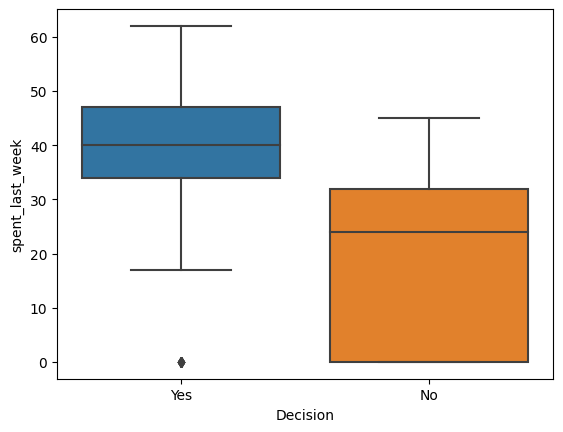

In [75]:
# Exploring our new NoPrediction dataset
# Make a boxplot on NoPrediction.
sns.boxplot(
      x    = 'Decision'
    , y    = 'spent_last_week'
    , data = NoPrediction
)

plt.show()

<b>Can you admissibly conclude anything from this boxplot? Write your answer here:</b>

* The "No" box is taller than the "Yes" box, suggesting that there might be skewness in the data. A taller box indicates a concentration of spending in a narrower range.

* The median for the "No" group is lower than that of the "Yes" group indicating that, on average, customers who decided to buy coffee ("Yes" group) spent more last week compared to customers who decided not to buy coffee ("No" group).

<Axes: xlabel='Distance', ylabel='spent_month'>

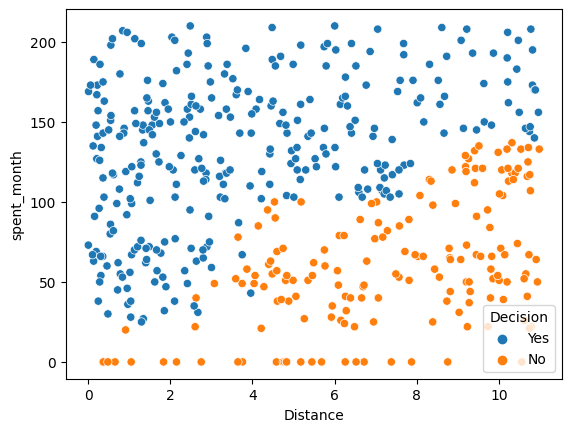

In [76]:
# Make a scatterplot on "NoPrediction"
sns.scatterplot(
      x    = 'Distance'
    , y    = 'spent_month'
    , data = NoPrediction
    , hue  = 'Decision'
)

<b>Can you admissibly conclude anything from this scatterplot? Remember: we are trying to build a tree to classify unseen examples. Write your answer here:</b>

* The purity seems sufficient. it's something we can work around. The points of the classes don't seem to be mixed with each other.

* People who live nearby , tend to buy coffee often. The graph shows that they would like to try new flavor. however , there are customers who live far and buy cofee from this shop. we can say they are loyal customers and it is also seen that they would like to try new flavor

### 3. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction

In [77]:
# Get just those rows whose value for the Decision column is null
Prediction = coffeeData[coffeeData['Decision'].isnull()]
Prediction.head()

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_month,salary,Distance,Online,Decision
1,24,Male,0,44,164,74035,0.52,0,NaN
3,20,Male,0,30,107,13166,0.93,1,NaN
7,24,FeMale,0,20,34,17425,1.19,0,NaN
11,24,FeMale,0,40,153,84803,1.66,1,NaN
12,21,FeMale,0,38,122,42338,1.71,1,NaN


In [78]:
# Call describe() on Prediction
Prediction.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_month,salary,Distance,Online
count,228.00,228.00,228.00,228.00,228.00,228.00,228.00
mean,31.80,2.96,33.39,110.41,41923.74,3.43,0.57
std,14.30,1.59,15.70,53.79,27406.77,2.15,0.50
min,16.00,0.00,0.00,0.00,1617.00,0.01,0.00
25%,22.00,2.00,25.75,65.00,15911.50,1.70,0.00
50%,25.00,3.00,37.00,113.50,40987.50,3.21,1.00
75%,39.00,4.00,44.00,151.25,58537.00,5.26,1.00
max,67.00,5.00,62.00,210.00,182058.00,10.87,1.00


### 4. Features and Target variable

Divide the <code><b>NoPrediction</b></code> subset into features dataframe <code><b>X</b></code> and target vector <code><b>y</b></code> .

In [79]:
# Check the names of the columns of NoPrediction
NoPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

First, let's select the target variable, the <code><b>Decision</b></code> column.

In [80]:
# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = NoPrediction['Decision']

To select features, make a variable called <code><b>features</b></code> , and a list containing the strings of every column, excluding the target column <code><b>Decision</b></code> .

In [81]:
features = [
    col
    for col
    in NoPrediction.columns
    if col != 'Decision'
]

Assign a subset of <code><b>NoPrediction</b></code> that contains all feature columns in the list, to an explanatory variable called <code><b>X</b></code>.

In [82]:
X = NoPrediction[features]

### 5. Transformation of categorical features

One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before.

**Note**: We will do this before we do our train/test split as to do it after could mean that some categories only end up in the train or test split of our data by chance and this would then lead to different shapes of data for our `X_train` and `X_test` which could/would cause downstream issues when fitting or predicting using a trained model.

In [83]:
# One-hot encode all features in X.
X = pd.get_dummies(X)

### 6. Train/Test Split

Further, divide those subsets into train and test subsets for <code><b>X</b></code> and <code><b>y</b></code> respectively: <code><b>X_train</b></code> , <code><b>X_test</b></code> , <code><b>y_train</b></code> , <code><b>y_test</b></code>

In [84]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
X_train, X_test, y_train, y_test = train_test_split(
      X
    , y
    , test_size    = 0.25
    , random_state = 246
)

---

# 3. Models
It's useful to look at the scikit-learn documentation on <a href="https://scikit-learn.org/stable/modules/tree.html"><b>Decision Trees (DTs)</b></a> before launching into applying them. If you haven't seen them before, take a look at that link, in particular the section `1.10.5.` In this case study, we build, train and evaluate four tree-based models as follow:

<table>
  <tr>
      <th>Model</th>
      <th><b>Max. depth of tree</b></th>
      <th>Criterion</th>
      <th>Description</th>
  </tr>
  <tr>
      <td><code><b>entr_model</b></code></td>
      <td><code>0</code></td>
      <td>Entropy</td>
      <td>A decision tree with a <code><b>max_depth=0</b></code> using <code><b>criterion='entropy'</b></code> .<br>In this model, the tree makes the root node as the only decision, which represents the <b>most frequent class</b> in the dataset.</td>
  </tr>
  <tr>
      <td><code><b>gini_model</b></code></td>
      <td><code>0</code></td>
      <td>Gini Impurity</td>
      <td>A decision tree with a <code><b>max_depth=0</b></code> using <code><b>criterion='gini'</b></code> . <br>Similar to the first model, this results in the root node representing the <b>most frequent class</b> in the dataset.</td>
  </tr>
  <tr>
      <td><code><b>entr_model2</b></code></td>
      <td><code>3</code></td>
      <td>Entropy</td>
      <td>A decision tree with a <code><b>max_depth=3</b></code> using <code><b>criterion='entropy'</b></code> .<br>This model creates a tree with a depth of up to 3 levels, making decisions based on <b>maximizing Information Gain</b> using the entropy measure.</td>
  </tr>
  <tr>
      <td><code><b>gini_model2</b></code></td>
      <td><code>3</code></td>
      <td>Gini Impurity</td>
      <td>A decision tree with a <code><b>max_depth=3</b></code> using <code><b>criterion='gini'</b></code> . <br>This model creates a tree with a depth of up to 3 levels, making decisions based on <b>minimizing Gini impurity</b>.</td>
  </tr>
</table>

> <b>NOTE:</b> <code><b>max_depth</b></code> is a crucial hyperparameter in decision tree algorithms, and it plays a significant role in controlling the complexity of the tree and influencing its predictive power. It specifies the maximum depth or levels that a decision tree can grow to during training. In other words, it limits the number of nodes from the root to the leaf in the tree structure. The primary purpose of setting a <code><b>max_depth</b></code> is to prevent the decision tree from becoming overly complex and potentially overfitting the training data. <b>Overfitting</b> occurs when the tree captures noise or random fluctuations in the data, making it perform poorly on unseen data. When <code><b>max_depth</b></code> is set to a smaller value, the resulting tree will be shallower and simpler. Conversely, if <code><b>max_depth</b></code> is set to a larger value or left unconstrained, the tree can become very deep and complex.

---

## $\large\textbf{3.1.}$ Entropy (<code><b>max_depth=0</b></code>)

We'll give you a little more guidance here, as the Python is hard to deduce, and scikitlearn takes some getting used to.

* Theoretically, let's remind ourselves of what's going on with a decision tree implementing an $\small\textbf{entropy model}$.

* Ross Quinlan's $\small\textbf{ID3 Algorithm}$ was one of the first, and one of the most basic, to use $\small\textbf{entropy}$ as a metric.

* $\small\textbf{Entropy model}$ is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree.

* The $\small\textbf{Information Gain (IG) model}$ of a specific feature with a threshold (e.g., <code><b>spent_last_month <= 138.0</b></code>) is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold.

* Naturally, we want to minimize $\small\textbf{entropy}$ and maximize $\small\textbf{IG}$.

* Quinlan's ID3 algorithm is designed to output a $\small\textbf{tree}$ such that the features at each $\small\textbf{node}$, starting from the $\small\textbf{root}$, and going all the way down to the $\small\textbf{leaves}$, have maximial $\small\textbf{IG}$. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category.

The first model will be the hardest. Persevere and you'll reap the rewards: you can use almost exactly the same code for the other models.

### Build/Fit/Predict

$\textbf{Model 1:}$ <code><b>entr_model</b></code>

In [85]:
entr_model, y_pred = build_fit_predict(
      X_train
    , y_train
    , X_test
    , method       = 'decision_tree'
    , criterion    = 'entropy'
    , random_state = 1234
    , max_depth    = None
)

entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

### Visualize

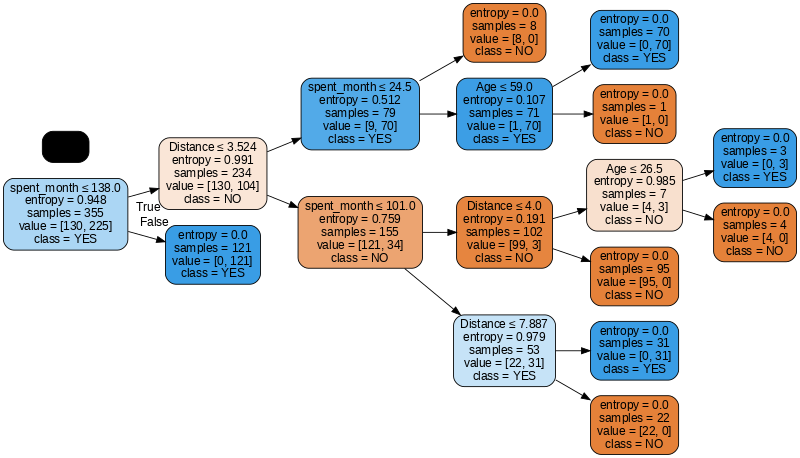

In [86]:
visualize_tree(
      entr_model
    , X_train.columns
)

### Evaluate

In [87]:
evaluate_metrics(
      y_test
    , y_pred
)

Metric                Score
-----------------  --------
accuracy           0.991597
balanced_accuracy  0.987805
precision ('Yes')  0.987342
precision ('No')   1
recall ('Yes')     1
recall ('No')      0.97561


### Results

<b>What can you infer from these results?</b>

* <b>Accuracy:</b> The model has achieved a very high accuracy of approximately 98.32%. This means that around 98.32% of the predictions made by the model are correct and it performs exceptionally well in terms of overall classification accuracy.

* <b>Balanced Accuracy:</b> The balanced accuracy is also very high at approximately 98.14%. Balanced accuracy takes into account the class imbalance in the dataset and is a good indicator of model performance when classes are unevenly distributed. In this case, it suggests that the model is performing well for both classes ('Yes' and 'No').

* <b>Precision:</b> High precision indicates that when a model predicts a class, it is very likely to be correct. This is crucial in scenarios where false positives are costly. Here:
  
  * The precision for the 'Yes' class is approximately 98.72%. This means that when the model predicts 'Yes', it is correct about 98.72% of the time. In other words, the model has a very low FPR for this  class.

  * The precision for the 'No' class is approximately 97.56%. This means that when the model predicts 'No', it is correct about 97.56% of the time. Similar to the 'Yes' class, the model has a low FPR for this class.

* <b>Recall (sensitivity):</b> High recall indicates that the model is proficient at correctly identifying instances of both classes in the dataset. It has a low FNR, which is important when it's vital to capture as many true positive instances as possible.

  * The recall (sensitivity) for the 'Yes' class is approximately 98.72%. This indicates that the model is able to correctly identify about 98.72% of all actual 'Yes' instances in the dataset. In other words, it has a low FNR for this class.

  * The recall (sensitivity) for the 'No' class is approximately 97.56%. This suggests that the model can correctly identify about 97.56% of all actual 'No' instances in the dataset, indicating a low FNR for this class.

### Conclusions

* The model's performance metrics collectively suggest that it is highly accurate, well-balanced in its predictions, and excels in terms of precision and recall for both classes.

* It can be considered a robust and reliable classifier for the given task, with the ability to correctly identify 'Yes' and 'No' instances with high accuracy while minimizing both FPs and FNs.

---

## $\large\textbf{3.2.}$ Gini (<code><b>max_depth=0</b></code>)

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive.

### Build/Fit/Predict

$\textbf{Model 2:}$ <code><b>gini_model</b></code>

In [88]:
# Make a variable called gini_model, and assign it exactly what you assigned
# entr_model with above, but with the criterion changed to 'gini'
gini_model, y_pred = build_fit_predict(
      X_train
    , y_train
    , X_test
    , method       = 'decision_tree'
    , criterion    = 'gini'
    , random_state = 1234
    , max_depth    = None
)

gini_model

DecisionTreeClassifier(random_state=1234)

### Visualize

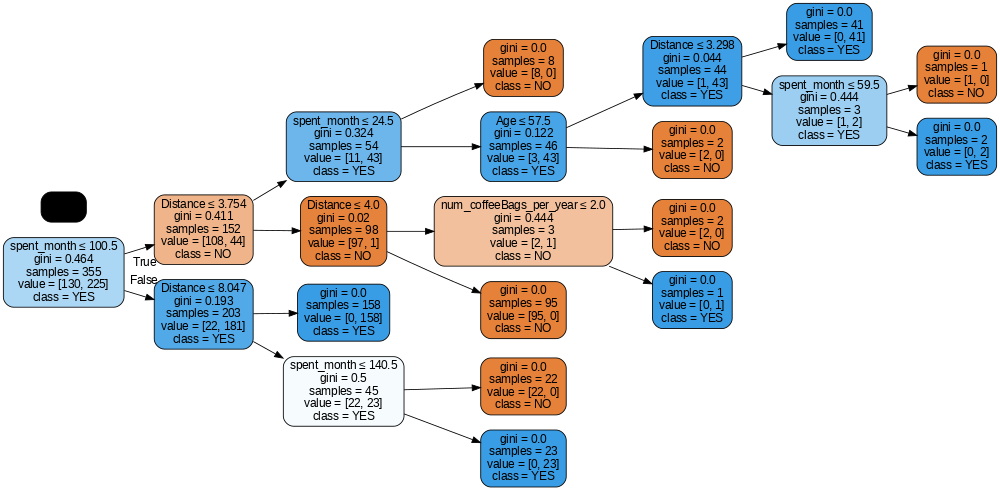

In [89]:
visualize_tree(
      gini_model
    , X_train.columns
    , graph_size = "5, 5"
)

### Evaluate

In [90]:
evaluate_metrics(
      y_test
    , y_pred
)

Metric                Score
-----------------  --------
accuracy           0.983193
balanced_accuracy  0.981395
precision ('Yes')  0.987179
precision ('No')   0.97561
recall ('Yes')     0.987179
recall ('No')      0.97561


### Results

<table>
  <caption>
    <b>Comparison of Model Performance Metrics</b>
  </caption>  
  <tr>
    <th>Metric</th>
    <th><code>model 1<br><b>entr_model<br>(max_depth=0)</b></code></th>
    <th><code>model 2<br><b>gini_model<br>(max_depth=0)</b></code></th>
  </tr>
  <tr>
    <td><code>accuracy</code></td>
    <td>0.991597</td>
    <td>0.983193</td>
  </tr>
  <tr>
    <td><code>balanced_accuracy</code></td>
    <td>0.987805</td>
    <td>0.981395</td>
  </tr>
  <tr>
    <td><code>precision ('yes')</code></td>
    <td>0.987342</td>
    <td>0.987179</td>
  </tr>
  <tr>
    <td><code>precision ('no')</code></td>
    <td>1.0</td>
    <td>0.97561</td>
  </tr>
  <tr>
    <td><code>recall ('yes')</code></td>
    <td>1.0</td>
    <td>0.987179</td>
  </tr>
  <tr>
    <td><code>recall ('no')</code></td>
    <td>0.97561</td>
    <td>0.97561</td>
  </tr>
</table>


* <code><b>accuracy</b></code>: The <b>Entropy-based</b> model has a slightly higher accuracy compared to the <b>Gini-based</b> model.

* <code><b>balanced_accuracy</b></code>: Similarly, the balanced accuracy of the <b>Entropy-based</b> model is slightly better than that of the <b>Gini-based</b> model, indicating better performance on imbalanced datasets.

* <code><b>precision</b></code>: The models have similar precision for <code><b>'Yes'</b></code> , but the <b>Entropy-based</b> model has a perfect precision for <code><b>'No'</b></code> , while the <b>Gini-based</b> model has a slightly lower precision.

* <code><b>recall</b></code>: The <b>Entropy-based</b> model has perfect recall for <code><b>'Yes'</b></code> , whereas the <b>Gini-based</b> model has a slightly lower recall. Both models have exactly the same recall for <code><b>'No'</b></code> .

### Conclusions

* The decision tree model employing the <b>Entropy</b> criterion (i.e., <code><b>entr_model</b></code>) consistently exhibits superior performance in terms of <code><b>accuracy</b></code> and <code><b>precision</b></code>, particularly in classifying instances labeled as <code><b>'No'</b></code> . Furthermore, it achieves flawless <code><b>recall</b></code> for instances marked as <code><b>'Yes'</b></code> .

* Nevertheless, it is imperative to acknowledge that both models demonstrate commendable overall performance. The selection between the Gini Impurity and Entropy criteria should be contingent upon the unique demands and inherent attributes of the dataset under consideration.

---

## $\large\textbf{3.3.}$ Entropy (<code><b>max_depth=3</b></code>)

We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth.

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data.

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes.

### Build/Fit/Predict

$\textbf{Model 3:}$ <code><b>entr_model2</b></code>

In [91]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3.
# Execute the fitting, predicting, and Series operations as before
entr_model2, y_pred = build_fit_predict(
      X_train
    , y_train
    , X_test
    , method       = 'decision_tree'
    , criterion    = 'entropy'
    , random_state = 1234
    , max_depth    = 3
)

entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

### Visualize

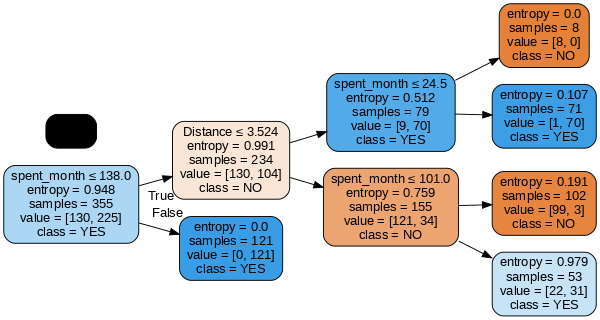

In [92]:
visualize_tree(
      entr_model2
    , X_train.columns
    , graph_size = "3, 3"
)

### Evaluate

In [93]:
evaluate_metrics(
      y_test
    , y_pred
)

Metric                Score
-----------------  --------
accuracy           0.907563
balanced_accuracy  0.865854
precision ('Yes')  0.876404
precision ('No')   1
recall ('Yes')     1
recall ('No')      0.731707


### Results

<table>
    <caption>
      <b>Comparison of Model Performance Metrics</b>
    </caption>
    <tr>
        <th>Metric</th>
        <th><code>model 1<br><b>entr_model<br>(max_depth=0)</b></code></th>
        <th><code>model 3<br><b>entr_model2<br>(max_depth=3)</b></code></th>
    </tr>
    <tr>
        <td><code>accuracy</code></td>
        <td>0.9916</td>
        <td>0.907563</td>
    </tr>
    <tr>
        <td><code>balanced_accuracy</code></td>
        <td>0.9878</td>
        <td>0.865854</td>
    </tr>
    <tr>
        <td><code>precision ('Yes')</code></td>
        <td>0.9873</td>
        <td>0.876404</td>
    </tr>
    <tr>
        <td><code>precision ('No')</code></td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td><code>recall ('Yes')</code></td>
        <td>1</td>
        <td>1</td>
    </tr>
    <tr>
        <td><code>recall ('No')</code></td>
        <td>0.9756</td>
        <td>0.731707</td>
    </tr>
</table>


### Conclusions

* Model 1 (max_depth=0) outperforms Model 3 in terms of accuracy, balanced accuracy, and recall for the 'No' class. It also has a slightly higher precision for the 'Yes' class. However, both models have perfect precision for the 'No' class and recall for the 'Yes' class.

  <b>So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1?</b>

* While Model 3 has a lower accuracy compared to Model 1, it's not necessarily an inferior tree. The choice between the two models should be based on a thorough evaluation of their performance across multiple metrics, an understanding of the dataset, and consideration of the specific objectives of the task. Model 3 might still have advantages in terms of capturing complex patterns or achieving specific precision-recall trade-offs, making it a valid choice depending on the circumstances.

* Model 1, with its higher accuracy and balanced accuracy, might be preferable if minimizing FPs and capturing more 'No' instances is crucial. However, Model 3 might still be suitable for applications where precision for the 'Yes' class is prioritized. As mentioned, the decision should be based on the specific goals and constraints of the task we perform.

---

## $\large\textbf{3.4.}$  Gini (<code><b>max_depth=3</b></code>)


We're now going to try the same with the Gini impurity model.

### Build/Fit/Predict

$\textbf{Model 4:}$ <code><b>gini_model2</b></code>

In [94]:
gini_model2, y_pred = build_fit_predict(
      X_train
    , y_train
    , X_test
    , method       = 'decision_tree'
    , criterion    = 'gini'
    , random_state = 1234
    , max_depth    = 3
)

gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

### Visualize

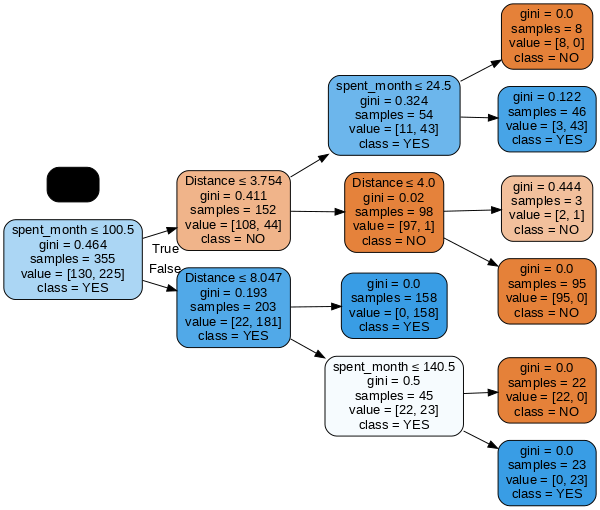

In [95]:
visualize_tree(
      gini_model2
    , X_train.columns
    , graph_size = "3, 3"
)

### Evaluate

In [96]:
evaluate_metrics(
      y_test
    , y_pred
)

Metric                Score
-----------------  --------
accuracy           0.97479
balanced_accuracy  0.969199
precision ('Yes')  0.974684
precision ('No')   0.975
recall ('Yes')     0.987179
recall ('No')      0.95122


### Results

<table>
  <tr>
    <th>Model<br>Name</th>
    <th>Classifier<br>Definition</th>
    <th><code><b>accuracy</th>
    <th><code><b>balanced<br>_accuracy</b></code></th>
    <th><code><b>precision<br>('Yes')</b></code></th>
    <th><code><b>precision<br>('No')</b></code></th>
    <th><code><b>recall<br>('Yes')</b></code></th>
    <th><code><b>recall<br>('No')</b></code></th>
  </tr>
  <tr>
    <td><code><b>entr_model</b></code></td>
    <td>
      <code>
        DecisionTreeClassifier(criterion='entropy', max_depth=0, random_state=1234)
        </code>
    </td>
    <td><b>0.991597</b></td>
    <td><b>0.987805</b></td>
    <td><b>0.987342</b></td>
    <td><b>1</b></td>
    <td><b>1</b></td>
    <td><b>0.97561</b></td>
  </tr>
  <tr>
    <td><code><b>gini_model</b></code></td>
    <td>
      <code>
        DecisionTreeClassifier(criterion='gini', max_depth=0, random_state=1234)
      </code>
    </td>
    <td>0.983193</td>
    <td>0.981395</td>
    <td>0.987179</td>
    <td>0.97561</td>
    <td>0.987179</td>
    <td>0.97561</td>
  </tr>
  <tr>
    <td><code><b>entr_model2</b></code></td>
    <td>
      <code>
        DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)
        </code>
    </td>
    <td>0.907563</td>
    <td>0.865854</td>
    <td>0.876404</td>
    <td><b>1</b></td>
    <td><b>1</b></td>
    <td>0.731707</td>
  </tr>
  <tr>
    <td><code><b>gini_model2</b></code></td>
    <td>
      <code>
        DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1234)
      </code>
    </td>
    <td>0.97479</td>
    <td>0.969199</td>
    <td>0.974684</td>
    <td>0.975</td>
    <td>0.987179</td>
    <td>0.95122</td>
  </tr>
</table>

### Conclusions

* At the first glance, these results indicate that the decision tree model with<b> entropy</b> and <b>no maximum depth</b> (i.e., <b>Model 1</b> or <code><b>entr_model</b></code>) is performing <b>exceptionally well</b> on <b>this</b> dataset. It has the highest <code><b>accuracy</b></code>, <code><b>balanced_accuracy</b></code>, and strong <code><b>precision</b></code> and <code><b>recall</b></code> scores for both classes (<code><b>'Yes'</b></code> and <code><b>'No'</b></code>), suggesting that it is a <b>robust</b> model for the given classification task.

* However, it's essential to consider potential overfitting when using an unbounded tree (i.e., <code><b>max_depth=0</b></code>), as it may lead to overly complex models that do not generalize well to unseen data.

<b>The <code><b>gini_model2</b></code> is an elegant tree. Its <code><b>accuracy</b></code> might not be the highest, but it's still the best model we've produced so far. Why is that?</b>


1. <b>Simplicity</b>: The <code><b>gini_model2</b></code> uses the Gini criterion and has a <code><b>max_depth=3</b></code>, which makes it a relatively simple decision tree model. Simplicity in machine learning models is often preferred because it reduces the risk of overfitting and makes the model more interpretable.

2. <b>Good Accuracy</b>: While it may not have the highest <code><b>accuracy</b></code> in the table, <code><b>0.97479</b></code> is still quite high. In many practical applications, achieving <code><b>accuracy</b></code> close to <code><b>1.0</b></code> is not necessary, and a slightly lower <code><b>accuracy</b></code> is acceptable as long as the model performs well and doesn't overcomplicate (i.e., overfit) the solution.

3. <b>Balanced Metrics</b>: The model also has a <code><b>balanced_accuracy</b></code> of <code><b>0.969199</b></code>, which indicates that it performs well on both positive (<code><b>'Yes'</b></code>) and negative (<code><b>'No'</b></code>) classes. This is important because in many real-world scenarios, imbalanced datasets are common, and a model that performs well on both classes is valuable.

4. <b>Interpretability</b>: The simplicity of the model makes it more interpretable, which means that we can easily understand how it's making decisions. This is important for gaining insights into the underlying data and model behavior.

5. <b>Efficiency</b>: Simple models are often computationally efficient, making them faster to train and use for predictions. This efficiency can be crucial in scenarios where quick decision-making is required.

6. <b>Reduced Risk of Overfitting</b>: The lower <code><b>max_depth=3</b></code> reduces the risk of overfitting, meaning that the model is less likely to memorize the training data and will generalize better to unseen (test) data.

---

# 4. Evaluating and concluding

## 4a. How many customers will buy Hidden Farm coffee?
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee.

In [97]:
# Call value_counts() on the 'Decision' column of the original coffeeData
coffeeData['Decision'].value_counts()

Yes    303
No     171
Name: Decision, dtype: int64

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee.

1. First we subset the <code><b>Prediction</b></code> dataset into <code><b>new_X</b></code> considering all the variables except <code><b>Decision</b></code> .

2. Use that dataset to predict a new variable called <code><b>potential_buyers</b></code> .

In [101]:
# Feature selection
# Make a variable called "feature_cols", and assign it a list containing all the column names except "Decision"
feature_cols = [
    col
    for col
    in Prediction.columns
    if col != 'Decision'
]

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols
new_X = Prediction[
    feature_cols
]

In [102]:
# Call get_dummies() on the Pandas object pd, with "new_X" plugged in, to one-hot encode all features in the training set
new_X = pd.get_dummies(
    new_X
)

# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice;
# don't forget to pass "new_X" to predict()
potential_buyers = gini_model2.predict(
    new_X
)

In [103]:
# Let's get the numbers of YES's and NO's in the potential buyers
# Call unique() on np, and pass potential_buyers and return_counts=True
np.unique(
      potential_buyers
    , return_counts=True
)

(array(['No', 'Yes'], dtype=object), array([ 45, 183]))

The total number of potential buyers is $303 + 183 = 486$.

In [104]:
# Print the total number of surveyed people
print(f"The total number of surveyed people was {coffeeData.salary.count()}")

The total number of surveyed people was 702


In [109]:
# Let's calculate the proportion of buyers
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model

print(f'percentage of people who want to buy the Hidden Farm coffee by our model (gini_model2) is {round((486/coffeeData.salary.count())*100, 2)}%.')

percentage of people who want to buy the Hidden Farm coffee by our model (gini_model2) is 69.23%.


## 4b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. Well now's crunch time. Are you going to go ahead with that idea? If so, you won't be striking the deal with the Chinese farmers.

They're called `decision trees`, aren't they? So where's the decision? What should you do? (Cue existential cat emoji).

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. What are you going to do with the models you've made? Are you going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee?

The philosopher of language Jason Stanley once wrote that the number of doubts our evidence has to rule out in order for us to know a given proposition depends on our stakes: the higher our stakes, the more doubts our evidence has to rule out, and therefore the harder it is for us to know things. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation.

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

---

## 5. Random Forest
You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness.

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. Luckily, there's a method for this, known as the ***Random Forest***.

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting.

Why not try to inform your decision with random forest? You'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

### Build/Fit/Predict
* You'll use your <code><b>X_train</b></code> and <code><b>y_train</b></code> variables just as before.

* You'll then need to make a variable (call it <code><b>firstRFModel</b></code>) to store your new Random Forest model. You'll assign this variable the result of calling <code><b>RandomForestClassifier()</b></code> .

* Then, just as before, you'll call <code><b>fit()</b></code> on that <code><b>firstRFModel</b></code> variable, and plug in <code><b>X_train</b></code> and <code><b>y_train</b></code> .

* Finally, you should make a variable called <code><b>y_pred</b></code>, and assign it the result of calling the <code><b>predict()</b></code> method on your new <code><b>firstRFModel</b></code> , with the <code><b>X_test</b></code> data passed to it.

In [ ]:
firstRFModel, y_pred = build_fit_predict(
      X_train
    , y_train
    , X_test
    , method       = 'random_forest'
    , criterion    = 'gini'
    , random_state = 1234
    , max_depth    = 3
)

firstRFModel

RandomForestClassifier(max_depth=3, random_state=1234)

Select the 6th estimator (decision tree) from the ensemble <code><b>firstRFModel</b></code> :

In [ ]:
estimator = firstRFModel.estimators_[5]
estimator

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=481516916)

### Visualize

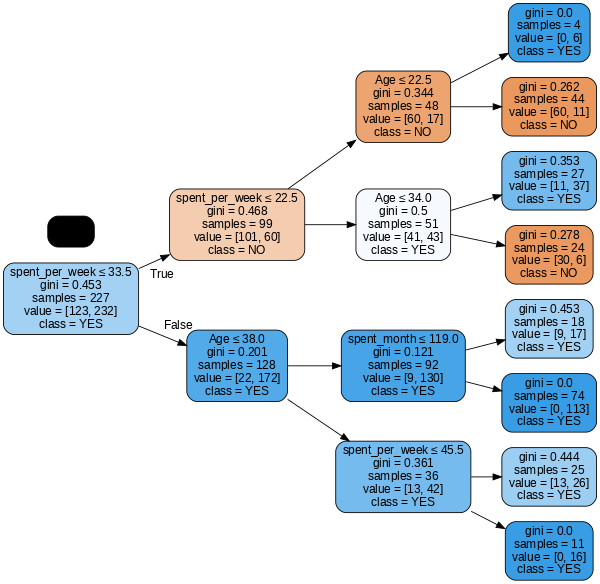

In [ ]:
visualize_tree(
      estimator
    , X_train.columns
    , graph_size = "3, 3"
)

### Evaluate

In [ ]:
evaluate_metrics(
      y_test
    , y_pred
)

Metric                Score
-----------------  --------
accuracy           0.941176
balanced_accuracy  0.920419
precision ('Yes')  0.927711
precision ('No')   0.972222
recall ('Yes')     0.987179
recall ('No')      0.853659


### Conclusions

<b>Has your conclusion changed? Or is the result of executing random forest the same as your best model reached by a single decision tree?</b>

The random forect classifier <code><b>firstRFModel</b></code> did not give better results. The best model so far is <code><b>gini_model2</b></code> .